## CM3 DATA 가공하기 

In [71]:

# CM3 data로 복습하기 1 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
import sweetviz as sv
from statsmodels.formula.api import ols
import datetime as dt 

import warnings
warnings.filterwarnings("ignore")

In [72]:
# 분석 연습 파일 불러오기
cm3 = pd.read_excel("d:/novelis/ds2023/CM3_분석연습.xls")
cm3.head(3)

,구분,회수율,시작일시,종료일시,준비시간,작업시간,소요시간(UPTIME),Batch No,YS_TARGET_온도,Make as Alloy,...,GAUGE 3SIGMA,FLATNESS 3SIGMA,ENTRY WEIGHT,2STD 평균속도,2STD 최대속도,2STD BENDING,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도,COIL TEMP DIFF
0,NaN,97.21,2023-01-01 06:27:25,2023-01-01 06:37:00,2.83,6.75,9.58,S843331,165.0,M3104,...,0.82,2.76,11881.0,1109.0,1392.0,14.3,489.0,58.0,142.53360,-22.46640
1,NaN,97.30,2023-01-01 06:37:00,2023-01-01 06:46:01,2.73,6.28,9.01,S843341,165.0,M3104,...,0.78,3.12,11876.0,1180.0,1518.0,16.7,485.0,58.0,142.68825,-22.31175
2,NaN,97.47,2023-01-01 06:46:00,2023-01-01 06:56:10,2.87,7.28,10.15,S841842,170.0,K3104,...,0.77,3.37,12312.0,1242.0,1569.0,38.9,442.0,62.0,142.10706,-27.89294


In [73]:
cm3_a = cm3[['구분','Batch No', '회수율', '시작일시', '종료일시', '준비시간', '작업시간', '소요시간(UPTIME)']]
cm3_b = cm3[['Batch No','시작일시', '종료일시','YS_TARGET_온도', 'Make as Alloy', 'Pass','폭', 'ENTRY GAUGE', 'INTER GAUGE', 'EXIT GAUGE']]
cm3_c = cm3[['Batch No','시작일시', '종료일시','2STD BENDING','2STD 평균속도', '2STD 최대속도', '2STD ROLL FORCE', '입측 COIL온도', '평균 출측 온도']]

In [74]:
# 날짜 바꾸기

# A조: 06:30 ~ 14:30 / B조: 14:30 ~ 22:30 / C조: 22:30 ~ 06:30
# 예: 2023-01-01 05:30:00 작업 이력은 2022-12-31의 작업분 
# 따라서 Day 표시에는 1일이 아닌 31일이어야함 


In [75]:
cm3_b.set_index("시작일시", inplace = True) 

In [76]:
cm3_b.head(3)

,Batch No,종료일시,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE
시작일시,,,,,,,,,
2023-01-01 06:27:25,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271
2023-01-01 06:37:00,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271
2023-01-01 06:46:00,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261


In [77]:
# Timedelta: 시간 또는 날짜의 차이를 계산하는 method
# 단, 한번만 동작 후 비활성화로 바꿔야함. 

# cm3_b.index = cm3_b.index - pd.Timedelta(hours=6, minutes=30) 

In [78]:
cm3_b.head(3)

,Batch No,종료일시,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE
시작일시,,,,,,,,,
2023-01-01 06:27:25,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271
2023-01-01 06:37:00,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271
2023-01-01 06:46:00,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261


In [79]:
cm3_b["Year"]  = cm3_b.index.year
cm3_b["Month"] = cm3_b.index.month
cm3_b["Day"]   = cm3_b.index.day 

In [80]:
# 데이터 엑셀로 저장하기

# cm3_b.to_excel(excel_writer ="d:/ds2023/data_processing_2023_0831_1600.xlsx",
#                sheet_name   ="cm3_b",
#                header       = True,
#                index        = False)

In [81]:
cm3_b.resample('D')['폭'].mean().round(0)

시작일시
2023-01-01    1702.0
2023-01-02    1742.0
2023-01-03    1695.0
2023-01-04    1707.0
2023-01-05    1698.0
               ...  
2023-08-21    1749.0
2023-08-22    1737.0
2023-08-23    1762.0
2023-08-24    1763.0
2023-08-25    1696.0
Freq: D, Name: 폭, Length: 237, dtype: float64

In [82]:
# 전체 기간에서의 폭 트렌드 데이터 확인

# sns.barplot(x = cm3_b.index,
#             y = cm3_b["폭"])

In [83]:
cm3_b.head(2)


,Batch No,종료일시,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE,Year,Month,Day
시작일시,,,,,,,,,,,,
2023-01-01 06:27:25,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271,2023,1,1
2023-01-01 06:37:00,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271,2023,1,1


In [84]:
cm3_b.columns

Index(['Batch No', '종료일시', 'YS_TARGET_온도', 'Make as Alloy', 'Pass', '폭',
       'ENTRY GAUGE', 'INTER GAUGE', 'EXIT GAUGE', 'Year', 'Month', 'Day'],
      dtype='object')

In [85]:
c1 = pd.DataFrame(cm3_b)
c1

,Batch No,종료일시,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE,Year,Month,Day
시작일시,,,,,,,,,,,,
2023-01-01 06:27:25,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271,2023,1,1
2023-01-01 06:37:00,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271,2023,1,1
2023-01-01 06:46:00,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261,2023,1,1
2023-01-01 06:56:10,S841912,2023-01-01 07:05:21,170.0,K3104,F,1575.0,1.999,0.733,0.261,2023,1,1
2023-01-01 07:05:21,S841911,2023-01-01 07:14:58,170.0,K3104,F,1575.0,2.017,0.735,0.261,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25 08:44:32,NaN,2023-08-25 08:51:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,8,25
2023-08-25 08:51:00,NaN,2023-08-25 08:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,8,25
2023-08-25 13:47:00,NaN,2023-08-25 13:51:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,8,25


In [86]:
c2 = c1[["Year", "Month", "Day", "폭", "Make as Alloy", "Pass"]]
c2

,Year,Month,Day,폭,Make as Alloy,Pass
시작일시,,,,,,
2023-01-01 06:27:25,2023,1,1,1755.0,M3104,F
2023-01-01 06:37:00,2023,1,1,1755.0,M3104,F
2023-01-01 06:46:00,2023,1,1,1575.0,K3104,F
2023-01-01 06:56:10,2023,1,1,1575.0,K3104,F
2023-01-01 07:05:21,2023,1,1,1575.0,K3104,F
...,...,...,...,...,...,...
2023-08-25 08:44:32,2023,8,25,NaN,NaN,NaN
2023-08-25 08:51:00,2023,8,25,NaN,NaN,NaN
2023-08-25 13:47:00,2023,8,25,NaN,NaN,NaN


In [87]:
# 폭이 1575w 인 물량의 데이터
c2.loc[c2.폭 == 1575, :]

,Year,Month,Day,폭,Make as Alloy,Pass
시작일시,,,,,,
2023-01-01 06:46:00,2023,1,1,1575.0,K3104,F
2023-01-01 06:56:10,2023,1,1,1575.0,K3104,F
2023-01-01 07:05:21,2023,1,1,1575.0,K3104,F
2023-01-01 07:14:58,2023,1,1,1575.0,K3104,F
2023-01-01 07:24:26,2023,1,1,1575.0,K3104,F
...,...,...,...,...,...,...
2023-08-25 12:49:05,2023,8,25,1575.0,M3104,F
2023-08-25 12:58:58,2023,8,25,1575.0,M3104,F
2023-08-25 13:08:35,2023,8,25,1575.0,M3104,F


In [88]:
c2["Width"] = c2["폭"].apply(lambda x : "Wide" if x >= 1600 else("Middle" if x >= 1500  else "Narrow"))
c2.head(10)

,Year,Month,Day,폭,Make as Alloy,Pass,Width
시작일시,,,,,,,
2023-01-01 06:27:25,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:37:00,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:46:00,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 06:56:10,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:05:21,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:14:58,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:24:26,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:33:43,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:43:21,2023,1,1,1575.0,K3104,F,Middle


In [89]:
c2["width_group"] = pd.cut(c2.폭,
                        bins = np.arange(start = 1000, stop =1910, step = 300),
                        right = False,
                        labels = ["Narrow", "Middle", "Wide"])
c2.tail(5)

,Year,Month,Day,폭,Make as Alloy,Pass,Width,width_group
시작일시,,,,,,,,
2023-08-25 08:44:32,2023,8,25,NaN,NaN,NaN,Narrow,NaN
2023-08-25 08:51:00,2023,8,25,NaN,NaN,NaN,Narrow,NaN
2023-08-25 13:47:00,2023,8,25,NaN,NaN,NaN,Narrow,NaN
2023-08-25 13:51:40,2023,8,25,1840.0,M3104,F,Wide,Wide
2023-08-25 14:09:55,2023,8,25,1791.0,K3104,F,Wide,Wide


In [90]:
del c2["width_group"]
c2

,Year,Month,Day,폭,Make as Alloy,Pass,Width
시작일시,,,,,,,
2023-01-01 06:27:25,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:37:00,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:46:00,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 06:56:10,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:05:21,2023,1,1,1575.0,K3104,F,Middle
...,...,...,...,...,...,...,...
2023-08-25 08:44:32,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 08:51:00,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 13:47:00,2023,8,25,NaN,NaN,NaN,Narrow


In [91]:
# Alloy 순으로 오름 차순 (문자형)
c2.sort_values(by = "Make as Alloy", ascending = True)

,Year,Month,Day,폭,Make as Alloy,Pass,Width
시작일시,,,,,,,
2023-03-03 11:09:52,2023,3,3,1576.0,B3104,F,Middle
2023-04-12 05:09:38,2023,4,12,1576.0,B3104,F,Middle
2023-04-12 05:18:29,2023,4,12,1576.0,B3104,F,Middle
2023-04-12 05:27:24,2023,4,12,1576.0,B3104,F,Middle
2023-03-16 03:20:01,2023,3,16,1576.0,B3104,F,Middle
...,...,...,...,...,...,...,...
2023-08-25 05:25:00,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 07:36:10,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 08:44:32,2023,8,25,NaN,NaN,NaN,Narrow


In [92]:
c2.sort_values(by = "폭", ascending = True)

,Year,Month,Day,폭,Make as Alloy,Pass,Width
시작일시,,,,,,,
2023-04-28 14:59:31,2023,4,28,-1750.0,K3104,F,Narrow
2023-02-28 06:36:19,2023,2,28,1265.0,K3104,F,Narrow
2023-02-25 03:57:11,2023,2,25,1270.0,S3104,F,Narrow
2023-02-25 02:52:35,2023,2,25,1270.0,S3104,F,Narrow
2023-02-25 03:05:19,2023,2,25,1270.0,S3104,F,Narrow
...,...,...,...,...,...,...,...
2023-08-25 05:25:00,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 07:36:10,2023,8,25,NaN,NaN,NaN,Narrow
2023-08-25 08:44:32,2023,8,25,NaN,NaN,NaN,Narrow


In [93]:
c2.head()

,Year,Month,Day,폭,Make as Alloy,Pass,Width
시작일시,,,,,,,
2023-01-01 06:27:25,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:37:00,2023,1,1,1755.0,M3104,F,Wide
2023-01-01 06:46:00,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 06:56:10,2023,1,1,1575.0,K3104,F,Middle
2023-01-01 07:05:21,2023,1,1,1575.0,K3104,F,Middle


In [94]:
# cm3_b = cm3[['Batch No','시작일시', '종료일시','YS_TARGET_온도', 'Make as Alloy', 'Pass','폭', 'ENTRY GAUGE', 'INTER GAUGE', 'EXIT GAUGE']]
# cm3_c = cm3[['Batch No','시작일시', '종료일시','2STD BENDING','2STD 평균속도', '2STD 최대속도', '2STD ROLL FORCE', '입측 COIL온도', '평균 출측 온도']]

In [95]:
# "Batch No"를 Primary key로 데이터 병합

c3 = pd.merge(cm3_b, cm3_c, on = "Batch No", how = "inner")
c3

,Batch No,종료일시_x,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE,Year,Month,Day,시작일시,종료일시_y,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도
0,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271,2023,1,1,2023-01-01 06:27:25,2023-01-01 06:37:00,14.3,1109.0,1392.0,489.0,58.0,142.53360
1,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271,2023,1,1,2023-01-01 06:37:00,2023-01-01 06:46:01,16.7,1180.0,1518.0,485.0,58.0,142.68825
2,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261,2023,1,1,2023-01-01 06:46:00,2023-01-01 06:56:10,38.9,1242.0,1569.0,442.0,62.0,142.10706
3,S841912,2023-01-01 07:05:21,170.0,K3104,F,1575.0,1.999,0.733,0.261,2023,1,1,2023-01-01 06:56:10,2023-01-01 07:05:21,19.5,1238.0,1617.0,432.0,14.0,146.37471
4,S841911,2023-01-01 07:14:58,170.0,K3104,F,1575.0,2.017,0.735,0.261,2023,1,1,2023-01-01 07:05:21,2023-01-01 07:14:58,7.9,1196.0,1516.0,432.0,81.0,147.28151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17753370,S955555,2023-08-25 13:18:34,170.0,M3104,F,1575.0,1.908,0.715,0.260,2023,8,25,2023-08-25 13:08:35,2023-08-25 13:18:34,11.1,1156.0,1464.0,404.0,58.0,152.75910
17753371,S956442,2023-08-25 13:28:46,170.0,K3104,F,1575.0,1.909,0.716,0.261,2023,8,25,2023-08-25 13:18:34,2023-08-25 13:28:46,9.4,1167.0,1512.0,398.0,50.0,153.95192
17753372,S956441,2023-08-25 13:39:32,170.0,K3104,F,1575.0,1.915,0.710,0.261,2023,8,25,2023-08-25 13:28:46,2023-08-25 13:39:32,9.5,1117.0,1522.0,400.0,50.0,156.65623
17753373,S957406,2023-08-25 14:07:18,165.0,M3104,F,1840.0,1.909,0.707,0.240,2023,8,25,2023-08-25 13:51:40,2023-08-25 14:07:18,42.5,733.0,896.0,601.0,50.0,140.26799


In [96]:
# c3.set_index("시작일시", inplace=True)

In [97]:
c3.columns

Index(['Batch No', '종료일시_x', 'YS_TARGET_온도', 'Make as Alloy', 'Pass', '폭',
       'ENTRY GAUGE', 'INTER GAUGE', 'EXIT GAUGE', 'Year', 'Month', 'Day',
       '시작일시', '종료일시_y', '2STD BENDING', '2STD 평균속도', '2STD 최대속도',
       '2STD ROLL FORCE', '입측 COIL온도', '평균 출측 온도'],
      dtype='object')

In [98]:
c3.drop(columns = ["종료일시_x", "종료일시_y"])
c3.head()

,Batch No,종료일시_x,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE,Year,Month,Day,시작일시,종료일시_y,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도
0,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271,2023,1,1,2023-01-01 06:27:25,2023-01-01 06:37:00,14.3,1109.0,1392.0,489.0,58.0,142.53360
1,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271,2023,1,1,2023-01-01 06:37:00,2023-01-01 06:46:01,16.7,1180.0,1518.0,485.0,58.0,142.68825
2,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261,2023,1,1,2023-01-01 06:46:00,2023-01-01 06:56:10,38.9,1242.0,1569.0,442.0,62.0,142.10706
3,S841912,2023-01-01 07:05:21,170.0,K3104,F,1575.0,1.999,0.733,0.261,2023,1,1,2023-01-01 06:56:10,2023-01-01 07:05:21,19.5,1238.0,1617.0,432.0,14.0,146.37471
4,S841911,2023-01-01 07:14:58,170.0,K3104,F,1575.0,2.017,0.735,0.261,2023,1,1,2023-01-01 07:05:21,2023-01-01 07:14:58,7.9,1196.0,1516.0,432.0,81.0,147.28151


## 탐색적 데이터 분석 

In [99]:
#데이터의 종류 및 구분

# 범주형 데이터 : 문자, 숫자(숫자의 의미가 없음)
# - 명목형 데이터: 범주의 순서가 의미 없음 
# - 순서형 데이터: 범주의 순서가 의미 있음 
# 수치형 데이터 : 숫자(숫자의 의미가 있음) 
# - 이산형 데이터: 소수점이 의미 없음
# - 연속형 데이터: 소수점이 의미 있음

In [100]:
c3.head()

,Batch No,종료일시_x,YS_TARGET_온도,Make as Alloy,Pass,폭,ENTRY GAUGE,INTER GAUGE,EXIT GAUGE,Year,Month,Day,시작일시,종료일시_y,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도
0,S843331,2023-01-01 06:37:00,165.0,M3104,F,1755.0,1.907,0.729,0.271,2023,1,1,2023-01-01 06:27:25,2023-01-01 06:37:00,14.3,1109.0,1392.0,489.0,58.0,142.53360
1,S843341,2023-01-01 06:46:01,165.0,M3104,F,1755.0,1.905,0.729,0.271,2023,1,1,2023-01-01 06:37:00,2023-01-01 06:46:01,16.7,1180.0,1518.0,485.0,58.0,142.68825
2,S841842,2023-01-01 06:56:10,170.0,K3104,F,1575.0,2.012,0.735,0.261,2023,1,1,2023-01-01 06:46:00,2023-01-01 06:56:10,38.9,1242.0,1569.0,442.0,62.0,142.10706
3,S841912,2023-01-01 07:05:21,170.0,K3104,F,1575.0,1.999,0.733,0.261,2023,1,1,2023-01-01 06:56:10,2023-01-01 07:05:21,19.5,1238.0,1617.0,432.0,14.0,146.37471
4,S841911,2023-01-01 07:14:58,170.0,K3104,F,1575.0,2.017,0.735,0.261,2023,1,1,2023-01-01 07:05:21,2023-01-01 07:14:58,7.9,1196.0,1516.0,432.0,81.0,147.28151


In [101]:
c3.columns

Index(['Batch No', '종료일시_x', 'YS_TARGET_온도', 'Make as Alloy', 'Pass', '폭',
       'ENTRY GAUGE', 'INTER GAUGE', 'EXIT GAUGE', 'Year', 'Month', 'Day',
       '시작일시', '종료일시_y', '2STD BENDING', '2STD 평균속도', '2STD 최대속도',
       '2STD ROLL FORCE', '입측 COIL온도', '평균 출측 온도'],
      dtype='object')

In [102]:
c4 = c3[["Make as Alloy", "폭", "ENTRY GAUGE", "EXIT GAUGE", 
         "2STD BENDING","2STD 평균속도", "2STD 최대속도", 
         "2STD ROLL FORCE", "입측 COIL온도", "평균 출측 온도"]]
c4.head(5)

,Make as Alloy,폭,ENTRY GAUGE,EXIT GAUGE,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도
0,M3104,1755.0,1.907,0.271,14.3,1109.0,1392.0,489.0,58.0,142.53360
1,M3104,1755.0,1.905,0.271,16.7,1180.0,1518.0,485.0,58.0,142.68825
2,K3104,1575.0,2.012,0.261,38.9,1242.0,1569.0,442.0,62.0,142.10706
3,K3104,1575.0,1.999,0.261,19.5,1238.0,1617.0,432.0,14.0,146.37471
4,K3104,1575.0,2.017,0.261,7.9,1196.0,1516.0,432.0,81.0,147.28151


In [103]:
# 범주형 데이터: Make as Alloy, 폭, ENTRY GAUGE, EXIT GAUGE
# 수치형 데이터: 2STD BENDING, 2STD 평균속도, 2STD 최대속도, 2STD ROLL FORCE, 입측 COIL온도, 평균 출측 온도

In [104]:
# 범주형 데이터 분석: 1개의 열
# 표 = 빈도표 
# 데이터 시각화: 막대 그래프, 원그래프

In [105]:
# (2) 백분율 : (빈도/합계)*100
round(c4["Make as Alloy"].value_counts(normalize=True)*100, ndigits=1)

Make as Alloy
K3104    49.1
M3104    45.0
S3104     5.1
B3104     0.8
F5182     0.0
Name: proportion, dtype: float64

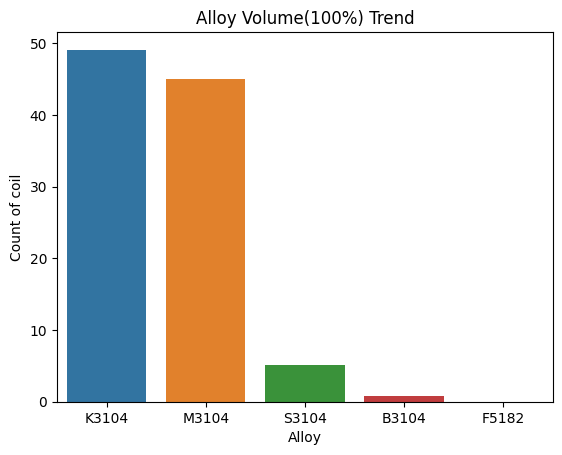

In [106]:
# 1.2 데이터 시각화 : 막대 그래프 

result = round(c4["Make as Alloy"].value_counts(normalize=True)*100, ndigits=1)

# bar 차트그리기

sns.barplot(x = result.index,
            y = result.values)

plt.title("Alloy Volume(100%) Trend") 
plt.xlabel("Alloy")
plt.ylabel("Count of coil")

sns.color_palette()
plt.show()

In [107]:
# 수치형 데이터 분석: 1개의 열
# 표 = 빈도표
# 데이터 시각화: 히스토그램, 상자그림, 바이올린
# 데이터의 요약: 기술통계량 = 요약통계량

In [119]:
c5 = c3[["Make as Alloy", "폭", "ENTRY GAUGE", "EXIT GAUGE", 
         "2STD BENDING","2STD 평균속도", "2STD 최대속도", 
         "2STD ROLL FORCE", "입측 COIL온도", "평균 출측 온도"]]
c5.head(5)

,Make as Alloy,폭,ENTRY GAUGE,EXIT GAUGE,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도
0,M3104,1755.0,1.907,0.271,14.3,1109.0,1392.0,489.0,58.0,142.53360
1,M3104,1755.0,1.905,0.271,16.7,1180.0,1518.0,485.0,58.0,142.68825
2,K3104,1575.0,2.012,0.261,38.9,1242.0,1569.0,442.0,62.0,142.10706
3,K3104,1575.0,1.999,0.261,19.5,1238.0,1617.0,432.0,14.0,146.37471
4,K3104,1575.0,2.017,0.261,7.9,1196.0,1516.0,432.0,81.0,147.28151


In [117]:
c5["2STD 최대속도"].max()

1779.0

In [118]:
# 구간의 정보를 갖는 새로운 열 만들기 
# 2STD 최대속도: 49 ~ 1799 mpm 
# 새로운 열의 이름: speed_group

# 1200 mpm 미만 : "Low"
# 1200 이상 ~ 1500mpm 미만 : "Normal"
# 1500 mpm 이상 : "High" 

In [120]:
c5["speed_group"] = pd.cut(c5["2STD 최대속도"],
                            bins = [0, 1200, 1500, 1800],
                            right = False,
                            labels = ["Low", "Normal", "High"])
c5.head()

,Make as Alloy,폭,ENTRY GAUGE,EXIT GAUGE,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도,speed_group
0,M3104,1755.0,1.907,0.271,14.3,1109.0,1392.0,489.0,58.0,142.53360,Normal
1,M3104,1755.0,1.905,0.271,16.7,1180.0,1518.0,485.0,58.0,142.68825,High
2,K3104,1575.0,2.012,0.261,38.9,1242.0,1569.0,442.0,62.0,142.10706,High
3,K3104,1575.0,1.999,0.261,19.5,1238.0,1617.0,432.0,14.0,146.37471,High
4,K3104,1575.0,2.017,0.261,7.9,1196.0,1516.0,432.0,81.0,147.28151,High


In [165]:
c5["width_group"] = pd.cut(c5["폭"],
                            bins = [-1800, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1900],
                            right = False,
                            labels = ["1200w이하", "1200w", "1300w", "1400w", "1500w", "1600w", "1700w", "1800w"])
c5.head(3)

,Make as Alloy,폭,ENTRY GAUGE,EXIT GAUGE,2STD BENDING,2STD 평균속도,2STD 최대속도,2STD ROLL FORCE,입측 COIL온도,평균 출측 온도,speed_group,width_group
0,M3104,1755.0,1.907,0.271,14.3,1109.0,1392.0,489.0,58.0,142.53360,Normal,1700w
1,M3104,1755.0,1.905,0.271,16.7,1180.0,1518.0,485.0,58.0,142.68825,High,1700w
2,K3104,1575.0,2.012,0.261,38.9,1242.0,1569.0,442.0,62.0,142.10706,High,1500w


In [166]:
# 구간의 빈도 
c5.speed_group.value_counts()

speed_group
Normal    12082
High      10303
Low        4029
Name: count, dtype: int64

In [167]:
# 구간의 백분율
round(c5.speed_group.value_counts(normalize=True)*100, ndigits = 1)

speed_group
Normal    45.7
High      39.0
Low       15.3
Name: proportion, dtype: float64

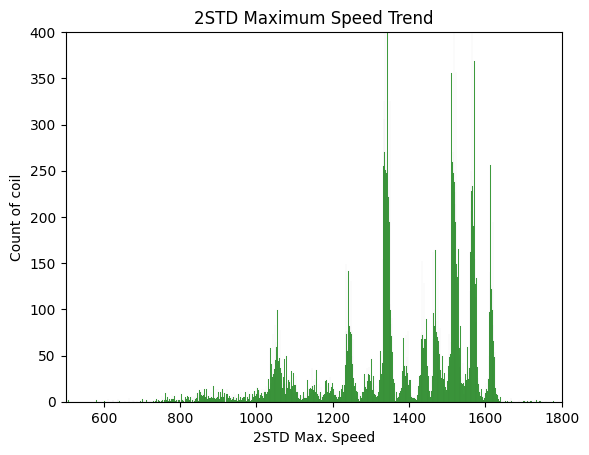

In [168]:
# 1.2 데이터 시각화
# (1) 히스토그램 
sns.histplot(data = c5, 
            x = "2STD 최대속도",
            bins = [0, 1200, 1500, 1800],    # 구간의 정보
            binwidth = 1.2,
            color = "g")
plt.title("2STD Maximum Speed Trend") 
plt.xlabel("2STD Max. Speed")
plt.ylabel("Count of coil")

plt.xlim((500, 1800))
plt.ylim((0, 400))
plt.savefig("CM3 2STD Maximum speed trend")
plt.show()

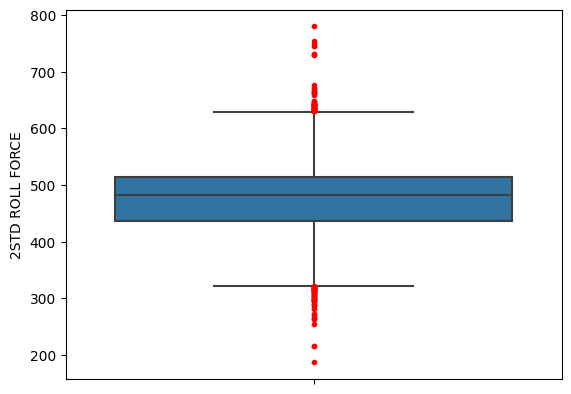

In [169]:
# (2) 상자그림
flierprops = dict(marker = "o",
                  markerfacecolor = "r",
                  markersize = 3,
                  linestyle = "none",
                  markeredgecolor = "r")


sns.boxplot(data = c5,
            y = c5["2STD ROLL FORCE"],
            flierprops = flierprops)
plt.show()

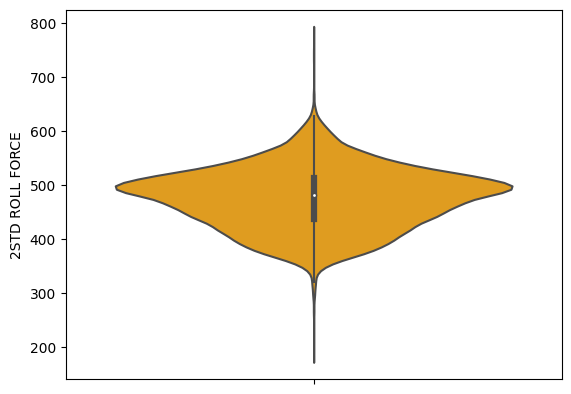

In [170]:
# (3) 바이올린 

sns.violinplot(data = c5, 
               y = c5["2STD ROLL FORCE"],
               color = "orange")
plt.show()

In [171]:
# 범주형 데이터: Make as Alloy, 폭, ENTRY GAUGE, EXIT GAUGE
# 수치형 데이터: 2STD BENDING, 2STD 평균속도, 2STD 최대속도, 2STD ROLL FORCE, 입측 COIL온도, 평균 출측 온도

In [172]:
# 결측값이 있는 행 전체 제거하기
c6 = c5.dropna(axis=0)

In [173]:
stats.describe(c6["2STD ROLL FORCE"])

DescribeResult(nobs=25266, minmax=(255.0, 780.0), mean=475.9799335074804, variance=3158.004861519426, skewness=-0.06798574552302296, kurtosis=-0.07207342123987281)

## 범주형 데이터 분석 : 2개의 열

### 범주형 데이터 : X : 독립변수, Feature          : Make as Alloy
### 범주형 데이터 : Y : 종속변수, Label or Target  : 폭 

In [175]:
pd.crosstab(index  = c6["Make as Alloy"],
            columns = c6["폭"],
            margins = True)

폭,-1750.0,1265.0,1270.0,1295.0,1375.0,1380.0,1465.0,1470.0,1475.0,1480.0,...,1820.0,1840.0,1860.0,1861.0,1870.0,1875.0,1880.0,1890.0,1895.0,All
Make as Alloy,,,,,,,,,,,,,,,,,,,,,
B3104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,230
F5182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
K3104,1,1,0,5,64,0,0,0,0,1,...,102,510,0,10,437,194,1,1,1,12474
M3104,0,0,6,0,26,8,1,1,2,0,...,547,1317,499,0,490,0,1,0,0,11216
S3104,0,0,9,23,24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1338
All,1,1,15,28,114,8,1,1,2,1,...,649,1827,499,10,927,194,2,1,1,25266


In [176]:
# Alloy별 폭 분포 현황표
pd.crosstab(index  = c6["Make as Alloy"], columns =c6["width_group"], margins = True)

width_group,1200w이하,1200w,1300w,1400w,1500w,1600w,1700w,1800w,All
Make as Alloy,,,,,,,,,
B3104,0,0,0,0,230,0,0,0,230
F5182,0,0,0,0,8,0,0,0,8
K3104,1,6,64,471,2703,781,7192,1256,12474
M3104,0,6,34,1432,690,1444,4738,2872,11216
S3104,0,32,24,0,575,0,707,0,1338
All,1,44,122,1903,4206,2225,12637,4128,25266


In [177]:
# Alloy별 폭 분포 현황표(백분율)
pd.crosstab(index  = c6["Make as Alloy"], columns =c6["width_group"], margins = True, normalize = True)*100

width_group,1200w이하,1200w,1300w,1400w,1500w,1600w,1700w,1800w,All
Make as Alloy,,,,,,,,,
B3104,0.000000,0.000000,0.000000,0.000000,0.910314,0.000000,0.000000,0.000000,0.910314
F5182,0.000000,0.000000,0.000000,0.000000,0.031663,0.000000,0.000000,0.000000,0.031663
K3104,0.003958,0.023747,0.253305,1.864165,10.698171,3.091111,28.465131,4.971107,49.370696
M3104,0.000000,0.023747,0.134568,5.667696,2.730943,5.715190,18.752474,11.367055,44.391673
S3104,0.000000,0.126652,0.094989,0.000000,2.275786,0.000000,2.798227,0.000000,5.295654
All,0.003958,0.174147,0.482862,7.531861,16.646877,8.806301,50.015832,16.338162,100.000000


In [178]:
# Alloy별 폭 분포 현황표( 행 백분율)
pd.crosstab(index  = c6["Make as Alloy"], columns =c6["width_group"], margins = True, normalize = "index")*100

width_group,1200w이하,1200w,1300w,1400w,1500w,1600w,1700w,1800w
Make as Alloy,,,,,,,,
B3104,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
F5182,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
K3104,0.008017,0.048100,0.513067,3.775854,21.669072,6.261023,57.655924,10.068943
M3104,0.000000,0.053495,0.303138,12.767475,6.151926,12.874465,42.243224,25.606277
S3104,0.000000,2.391629,1.793722,0.000000,42.974589,0.000000,52.840060,0.000000
All,0.003958,0.174147,0.482862,7.531861,16.646877,8.806301,50.015832,16.338162


In [179]:
# Alloy별 폭 분포 현황표(열 백분율)
pd.crosstab(index  = c6["Make as Alloy"], columns =c6["width_group"], margins = True, normalize = "columns")*100

width_group,1200w이하,1200w,1300w,1400w,1500w,1600w,1700w,1800w,All
Make as Alloy,,,,,,,,,
B3104,0.0,0.000000,0.000000,0.000000,5.468379,0.000000,0.000000,0.000000,0.910314
F5182,0.0,0.000000,0.000000,0.000000,0.190204,0.000000,0.000000,0.000000,0.031663
K3104,100.0,13.636364,52.459016,24.750394,64.265335,35.101124,56.912242,30.426357,49.370696
M3104,0.0,13.636364,27.868852,75.249606,16.405136,64.898876,37.493076,69.573643,44.391673
S3104,0.0,72.727273,19.672131,0.000000,13.670946,0.000000,5.594682,0.000000,5.295654


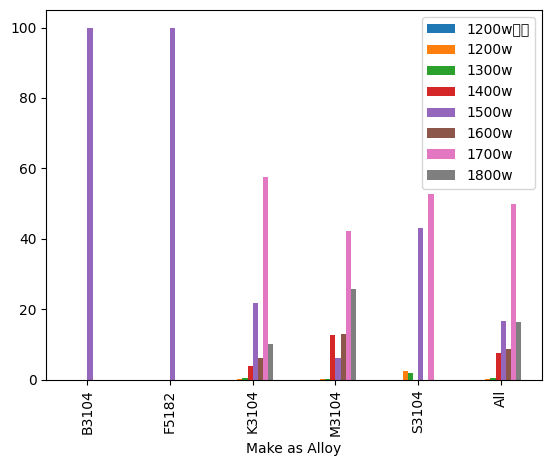

In [180]:
### 데이터 시각화

result1 = pd.crosstab(index  = c6["Make as Alloy"], 
                      columns =c6["width_group"], 
                      margins = True, 
                      normalize = "index")*100
result1.plot.bar(stacked = False)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

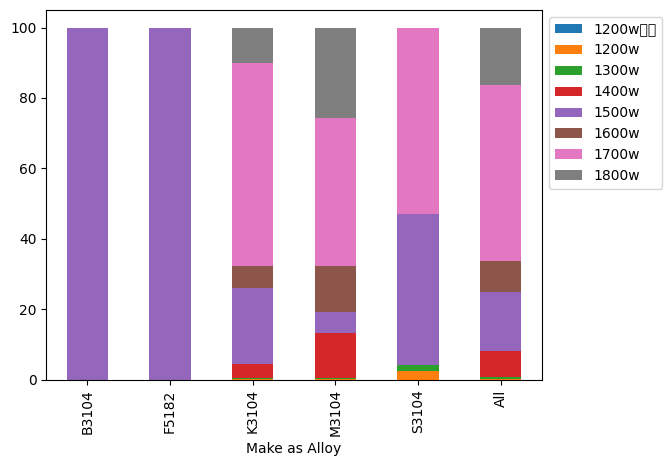

In [181]:
result1 = pd.crosstab(index  = c6["Make as Alloy"], 
                      columns =c6["width_group"], 
                      margins = True, 
                      normalize = "index")*100
result1.plot.bar(stacked = True)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

## 범주별 수치형 데이터 분석 : 2개의 열

### 범주형 데이터 : X : 독립변수, Feature   : 2STD ROLL FORCE
### 수치형 데이터 : Y : 종속변수, Label     : width_group

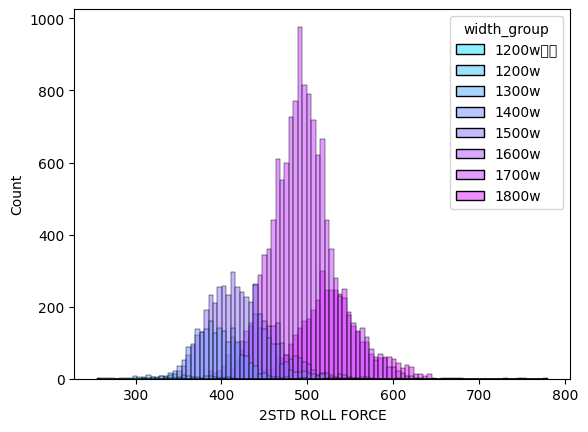

In [187]:
sns.histplot(data = c6,
             x = c6["2STD ROLL FORCE"],
             hue = c6["width_group"],
             palette="cool")
plt.show()

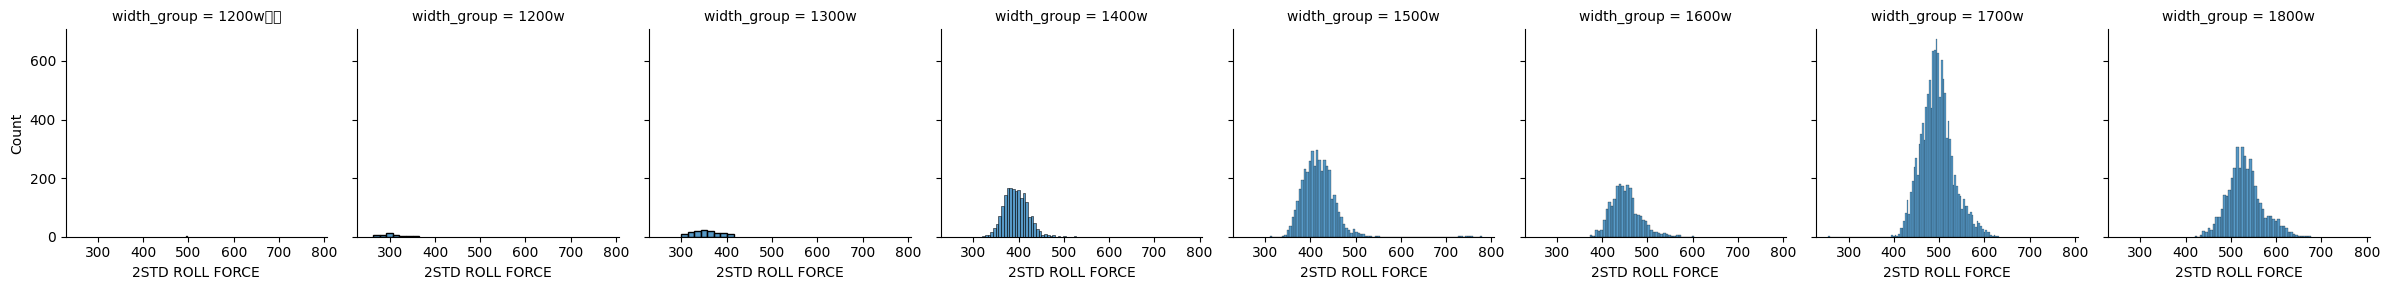

In [188]:
# seaborn.Facet(data, col = "범주형 데이터")
g = sns.FacetGrid(c6, col = "width_group")

# g.map(sns.scatterplot, "수치형 데이터")
g.map(sns.histplot, "2STD ROLL FORCE")

plt.show()

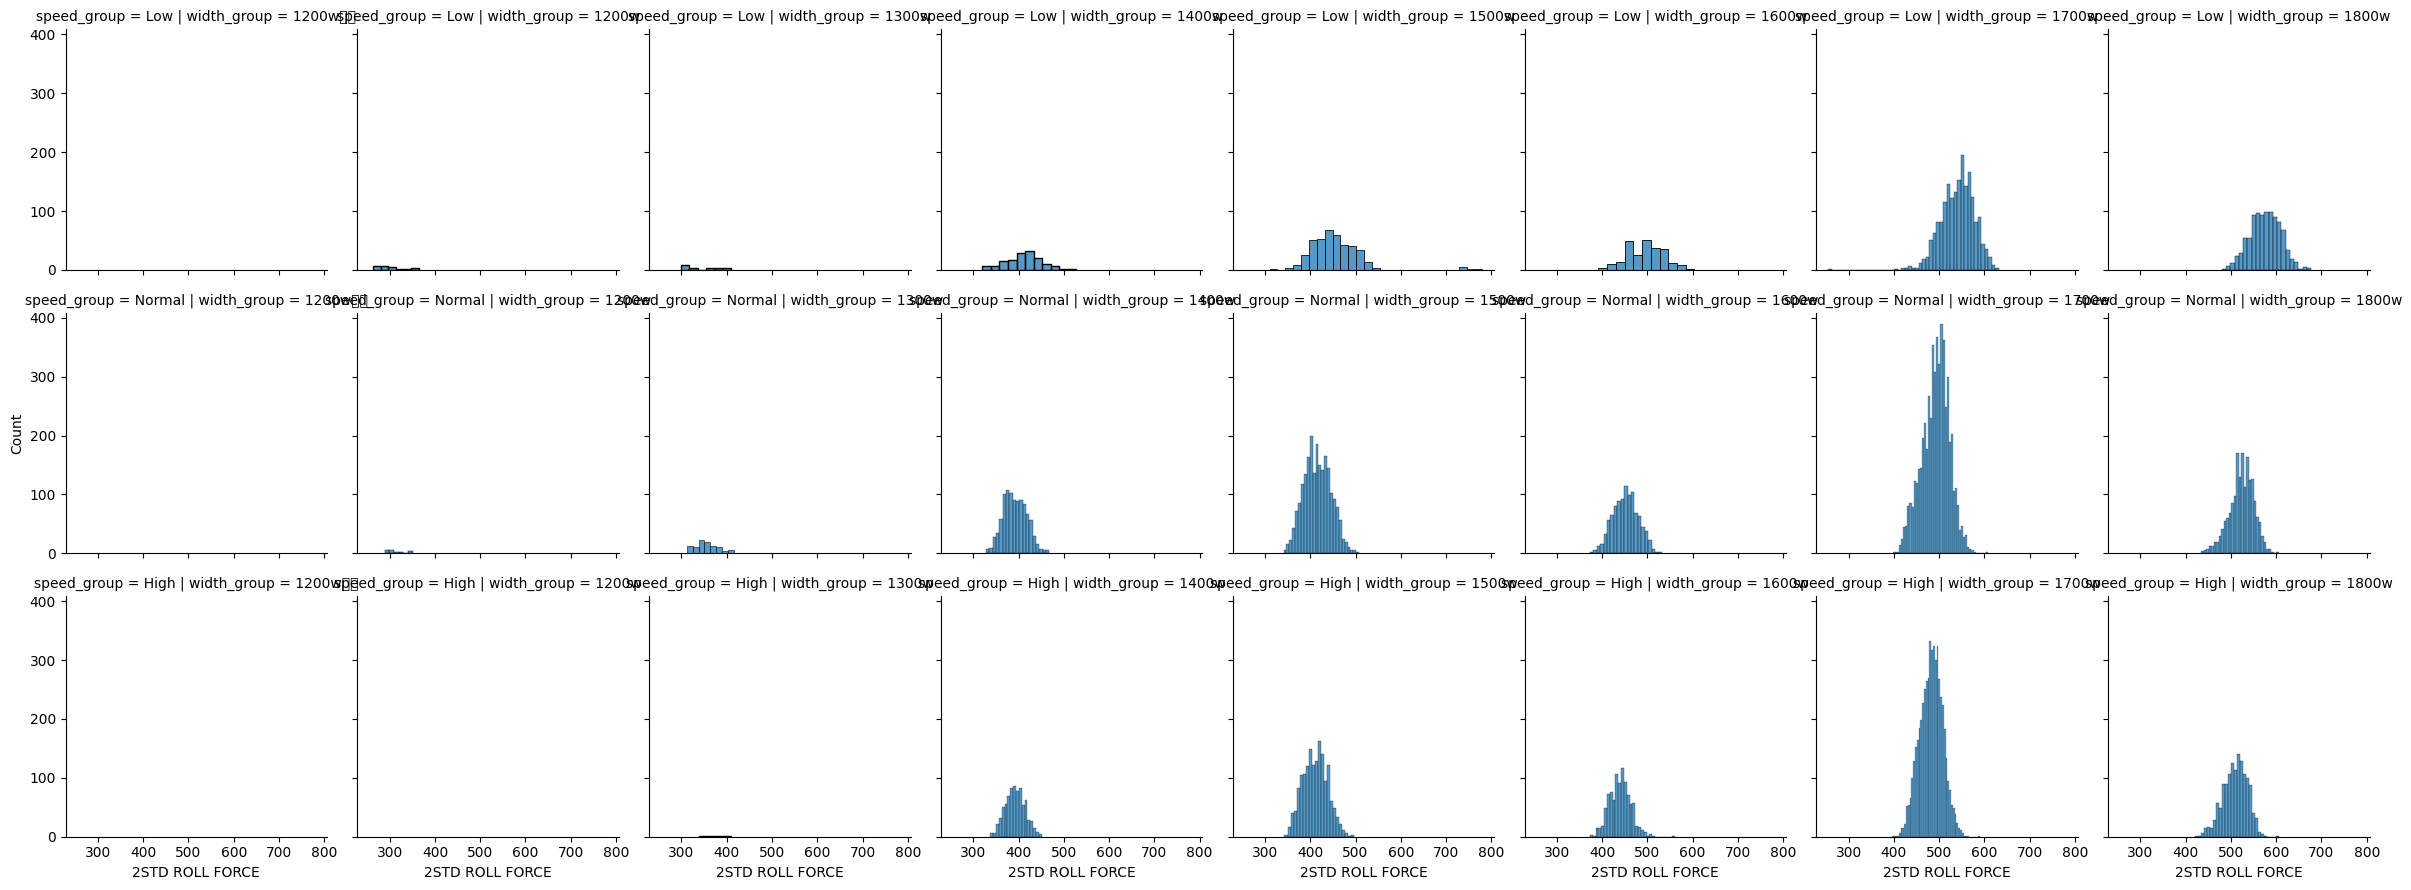

In [189]:
# seaborn.Facet(data, col = "범주형 데이터")
g = sns.FacetGrid(c6, row= "speed_group",col = "width_group")

# g.map(sns.scatterplot, "수치형 데이터")
g.map(sns.histplot, "2STD ROLL FORCE")

plt.show()

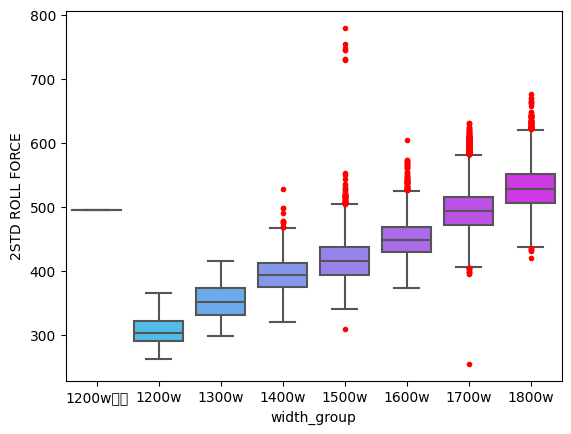

In [190]:
# (2) 범주별 상자그림
# seaborn.boxplot(data = , y = "수치형데이터", x = "범주형데이터")
# plt.show()


flierprops = dict(marker ="o",
                  markerfacecolor = "r",
                  markersize = 3,
                  linestyle = "none",
                  markeredgecolor = "r")  # 이상치에 적용할 스타일


sns.boxplot(data = c6, y = "2STD ROLL FORCE", x = "width_group",
            palette = "cool",
            flierprops = flierprops)
plt.show()

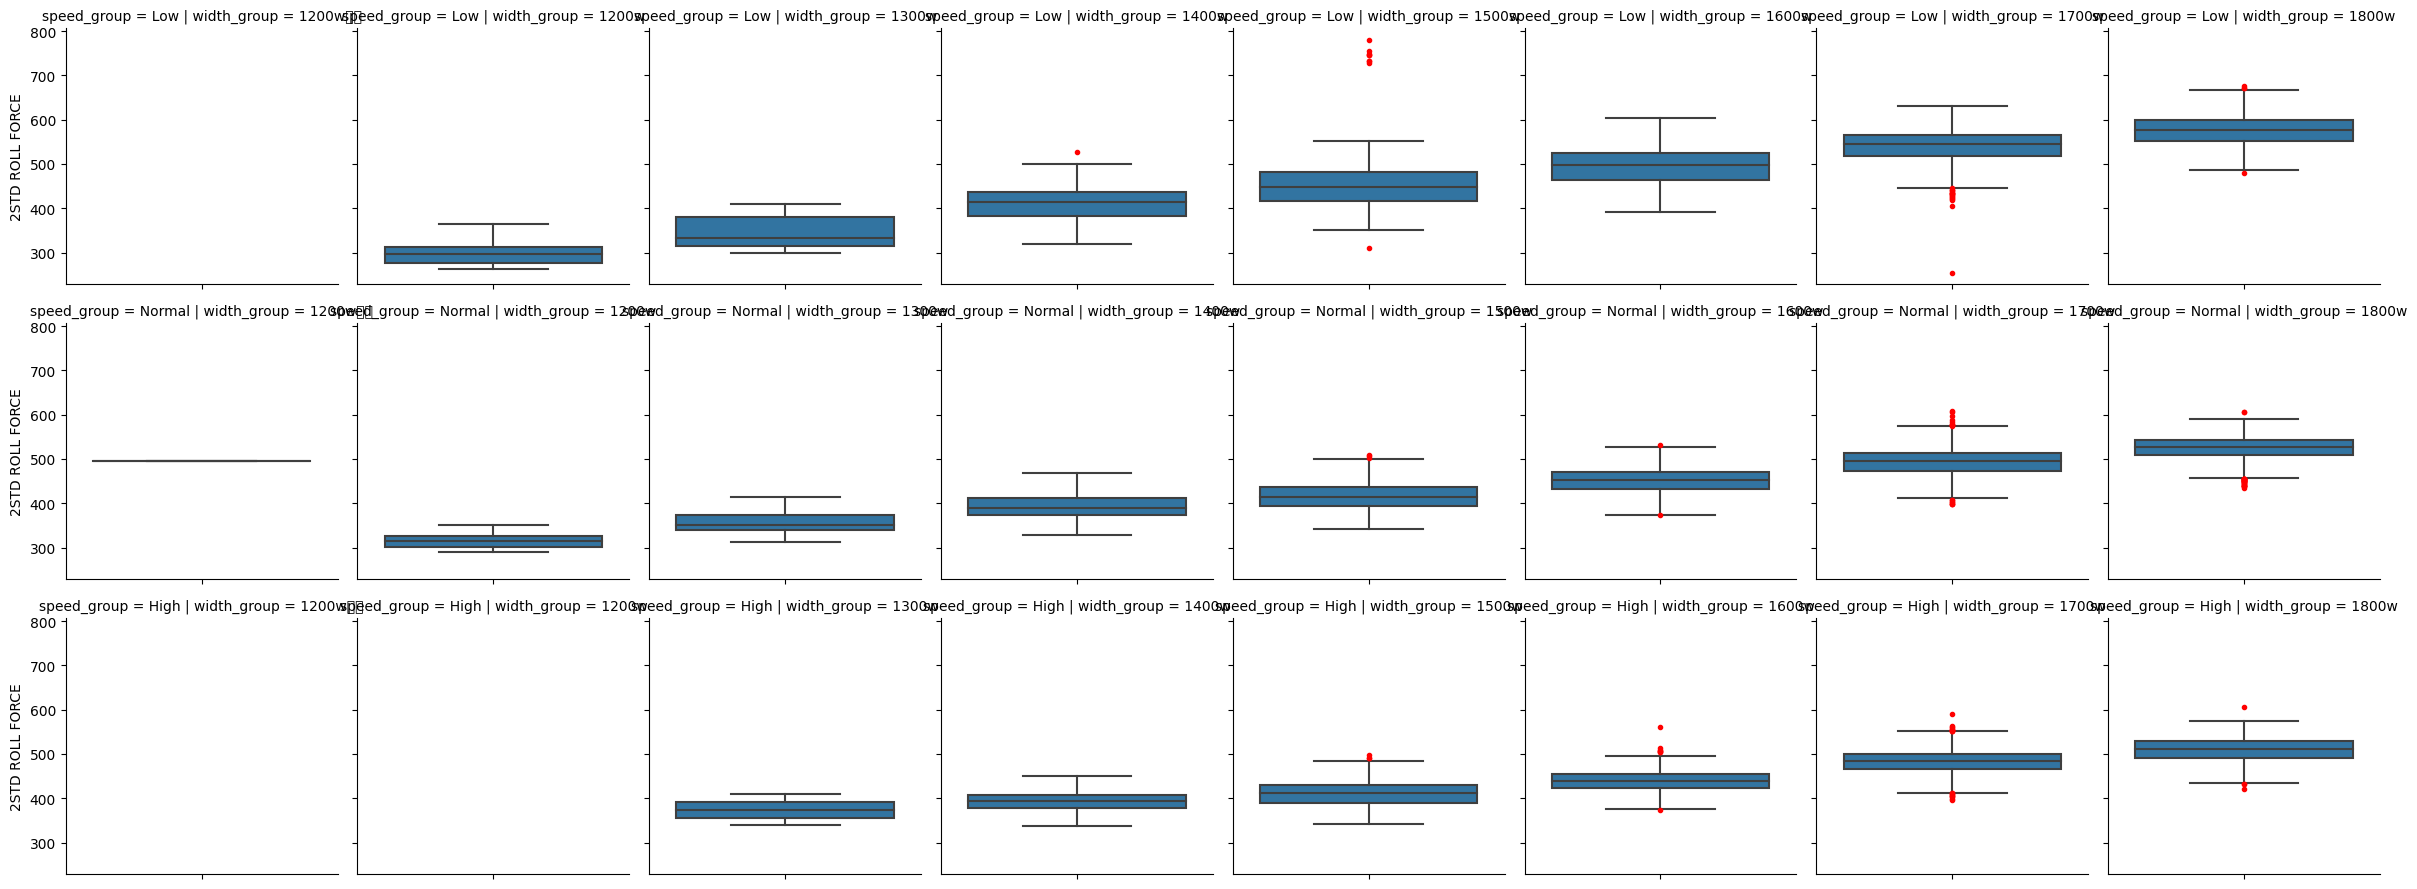

In [191]:
g = sns.FacetGrid(c6, row = "speed_group", col = "width_group")
g.map_dataframe(sns.boxplot, 
                y = "2STD ROLL FORCE",
                flierprops = flierprops)

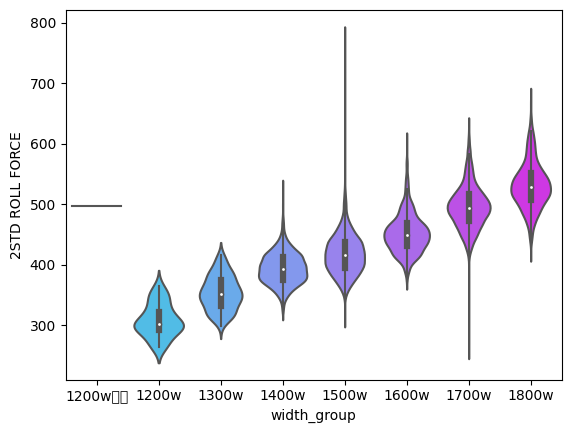

In [192]:
# (3) 범주별 바이올린
# seaborn.violinplot(data =  , y = "수치형데이터", x = "범주형데이터")
# plt.show()

sns.violinplot(data = c6, y = "2STD ROLL FORCE", x = "width_group",
            palette = "cool")
plt.show()

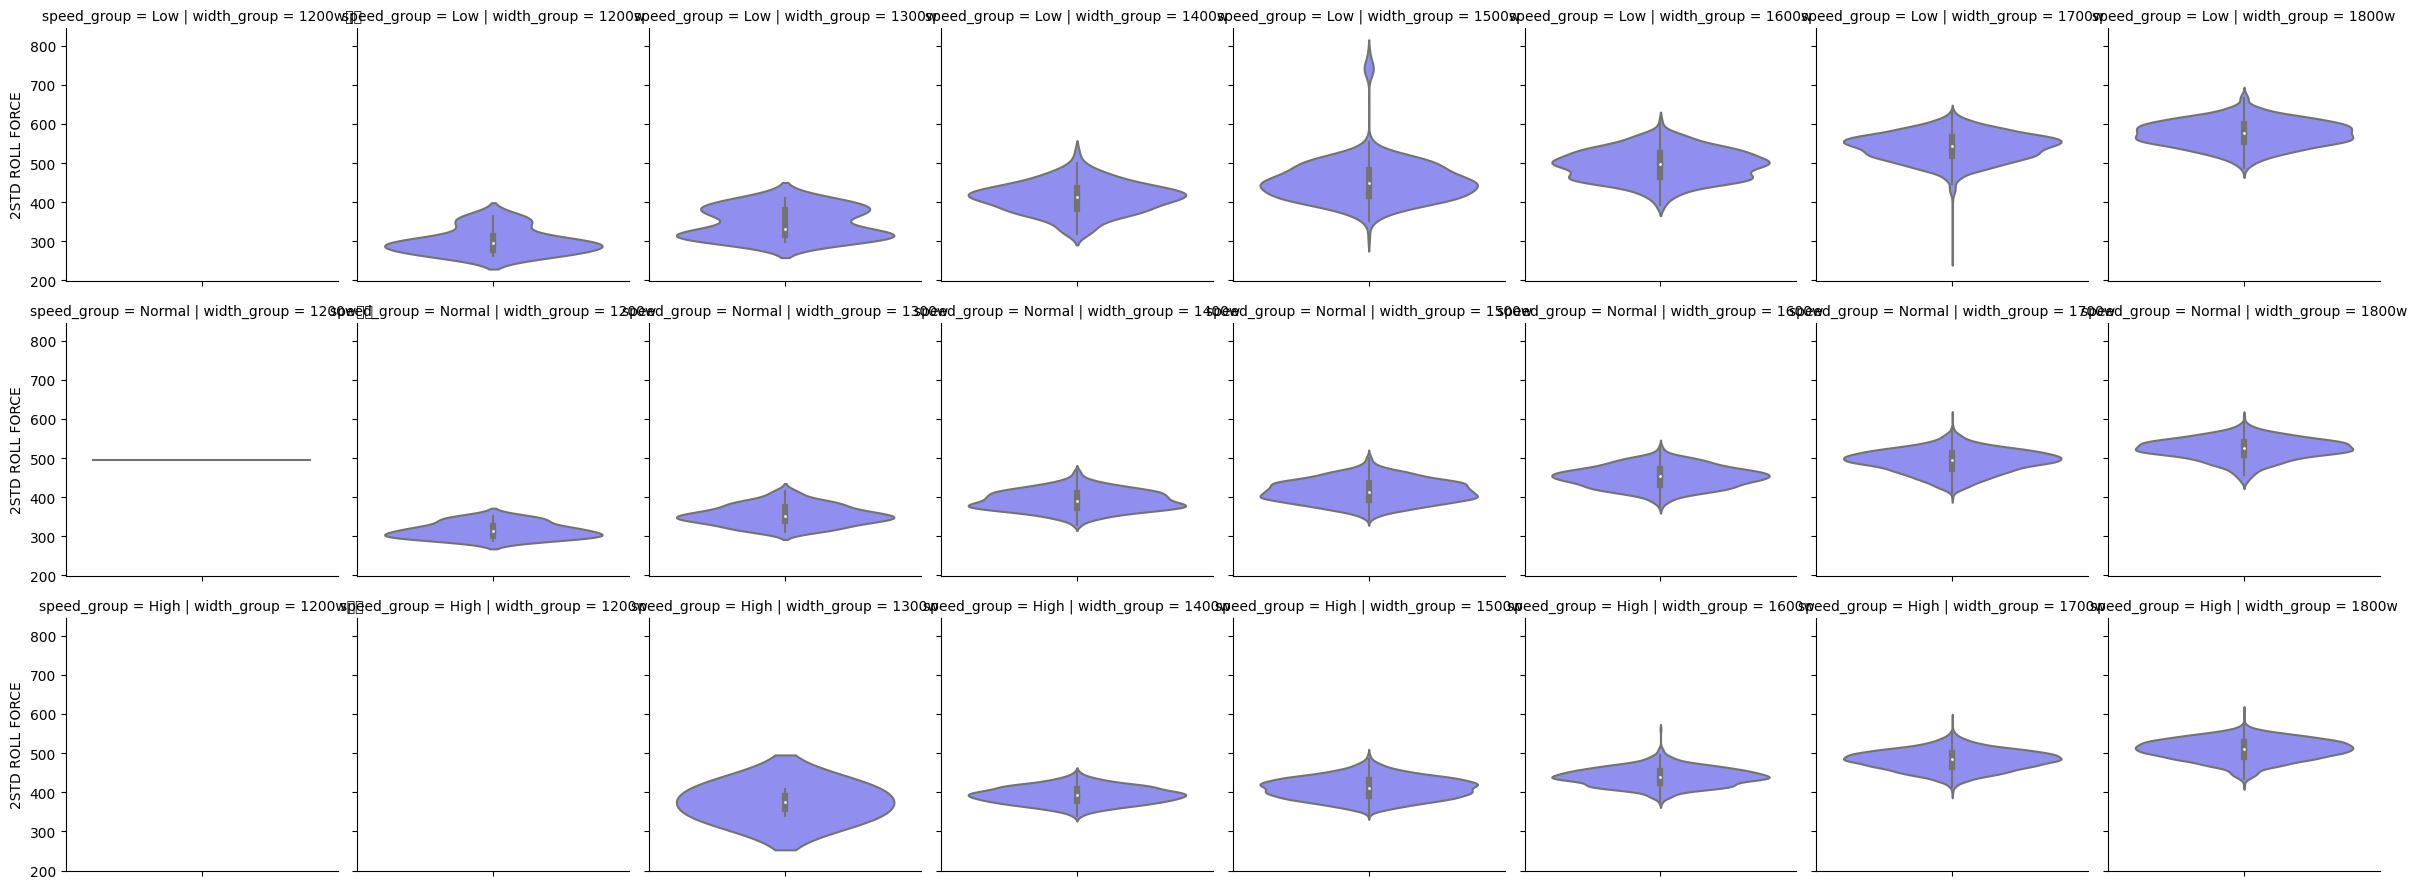

In [193]:
g = sns.FacetGrid(c6, row = "speed_group", col = "width_group")
g.map_dataframe(sns.violinplot, 
                y = "2STD ROLL FORCE",
                palette = "cool")
plt.show()

In [194]:
# 4.2 범주별 기술통계량 
# data.groupby("범주형데이터").수치형데이터.기술통계량함수()

In [201]:
c6.groupby(["width_group"])."2STD ROLL FORCE".describe()

SyntaxError: invalid syntax (3005673308.py, line 1)

In [ ]:
_